In [ ]:
import numpy as np
import pandas as pd
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
!pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 5.3 MB/s 
     |████████████████████████████████| 1.0 MB 68.6 MB/s 


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, Dropout, Bidirectional, LSTM, GRU, Input, GlobalMaxPooling1D, LayerNormalization, Conv1D, MaxPooling1D, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from pyvi import ViUtils

In [ ]:
foody_data = pd.read_csv('full_train.csv')
foody_data.head()

,Unnamed: 0,RevId,UserId,Comment,image_urls,Rating
0,0,3839333,10106093.0,"Xôi dẻo, đồ ăn đậm vị. Hộp xôi được lót lá trô...",['https://images.foody.vn/res/g97/966781/s800/...,1.0
1,1,2824877,786914.0,Gọi ship 1 xuất cari gà bánh naan và 3 miếng g...,['https://images.foody.vn/res/g69/688413/s800/...,0.0
2,2,9816702,22467889.0,"Thời tiết lạnh như này, cả nhà rủ nhau đến leg...",['https://images.foody.vn/res/g72/715078/s800/...,1.0
3,3,2684585,1889449.0,Em có đọc review thấy mng bảo trà sữa nướng đề...,['https://images.foody.vn/res/g90/895545/s800/...,0.0
4,4,2737987,8839942.0,"Đồ ăn rất ngon, nhà hàng cũng rất đẹp, tất cả ...",['https://images.foody.vn/res/g4/30186/s800/fo...,1.0


In [ ]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Unnamed: 0,RevId,UserId,Comment,image_urls
0,0,781115,1326532,Trà táo 35k\nCookie socola 38k \nNước ở đây bì...,['https://images.foody.vn/res/g8/73091/s800/fo...
1,1,1219481,422306,Hôm rồi trung tâm mình tổ chức noel party ở đâ...,['https://images.foody.vn/res/g1/33/s800/foody...
2,2,1703765,9779143,Thịt gà của quán là nhất đấy. Đi ăn gọi liền 4...,['https://images.foody.vn/res/g66/659655/s800/...
3,3,4870346,12924388,Hai đứa ăn xong đau bụng cả ngày\nChân gà ok n...,['https://images.foody.vn/res/g78/772244/s800/...
4,4,2638711,1134279,Mình vừa thử trưa nay. Điểm cộng đầu tiên là b...,['https://images.foody.vn/res/g74/737874/s800/...


In [ ]:
sentiment_data = pd.DataFrame({'Comment': foody_data['Comment'], 'Rating': foody_data['Rating']})
sentiment_data = sentiment_data.dropna()
sentiment_data = sentiment_data.reset_index(drop=True)
sentiment_data.head()

,Comment,Rating
0,"Xôi dẻo, đồ ăn đậm vị. Hộp xôi được lót lá trô...",1.0
1,Gọi ship 1 xuất cari gà bánh naan và 3 miếng g...,0.0
2,"Thời tiết lạnh như này, cả nhà rủ nhau đến leg...",1.0
3,Em có đọc review thấy mng bảo trà sữa nướng đề...,0.0
4,"Đồ ăn rất ngon, nhà hàng cũng rất đẹp, tất cả ...",1.0


In [ ]:
input_comment = sentiment_data['Comment'].values
input_rating = sentiment_data['Rating'].values
label_dict = {0.0:0, 1.0:1}

In [ ]:
input_pre = []
label_with_accent = []

for idx, dt in enumerate(input_comment):
  input_text_pre = list(tf.keras.preprocessing.text.text_to_word_sequence(dt))
  input_text_pre = " ".join(input_text_pre)
  input_text_pre_no_accent = str(ViUtils.remove_accents(input_text_pre).decode("utf-8"))
  input_text_pre_accent = ViTokenizer.tokenize(input_text_pre)
  input_text_pre_no_accent = ViTokenizer.tokenize(input_text_pre_no_accent)
  input_pre.append(input_text_pre_accent)
  input_pre.append(input_text_pre_no_accent)
  label_with_accent.append(input_rating[idx])
  label_with_accent.append(input_rating[idx])

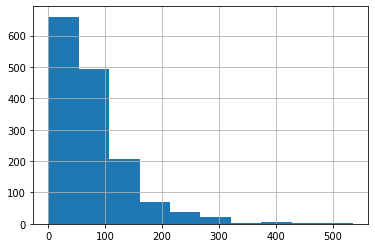

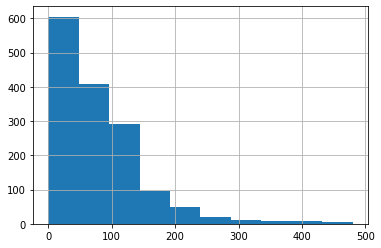

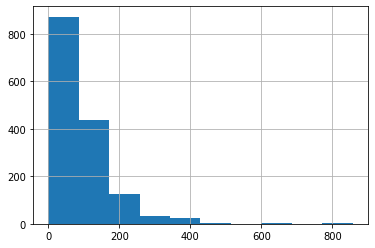

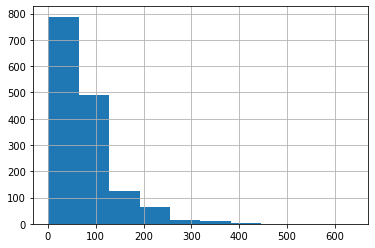

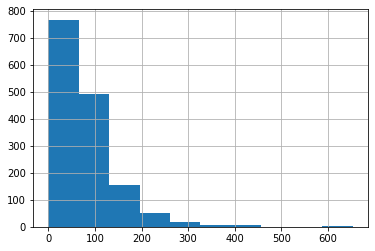

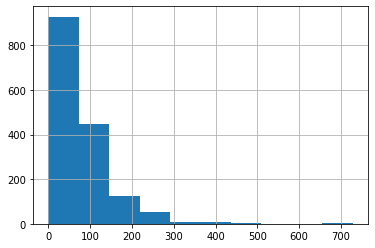

In [ ]:
seq_len = [len(i.split()) for i in input_pre[1:1500]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[1500:3000]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[3000:4500]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[4500:6000]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[6000:7500]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

seq_len = [len(i.split()) for i in input_pre[7500:9075]]
pd.Series(seq_len).hist(bins = 10)
plt.show()

In [ ]:
label_idx = [label_dict[i] for i in label_with_accent]
label_tf = tf.keras.utils.to_categorical(label_idx, num_classes=3, dtype='float32')

tokenizer_data = Tokenizer(oov_token='<OOV>', filters='', split=' ')
tokenizer_data.fit_on_texts(input_pre)

tokenizer_data_text = tokenizer_data.texts_to_sequences(input_pre)
vec_data = pad_sequences(tokenizer_data_text, padding='post', maxlen=600)

print("input data shape: ",vec_data.shape)
data_vocab_size = len(tokenizer_data.word_index)+1
print("data vocab size: ",data_vocab_size)

X_train, X_val, Y_train, Y_val = train_test_split(vec_data, label_tf, random_state=42)
print("training sample: ", len(X_train))
print("validation sample: ", len(X_val))

In [ ]:
def generate_model():
  dropout_threshold = 0.4
  input_dim = data_vocab_size
  output_dim = 32
  input_length = 600
  initializer = tf.keras.initializers.GlorotNormal()

  input_layer = Input(shape=(input_length))
  feature = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length, embeddings_initializer="GlorotNormal")(input_layer)

  cnn_feature = Conv1D(filters=32, kernel_size=3, padding='same',activation='relu')(feature)
  cnn_feature = MaxPooling1D()(cnn_feature)
  cnn_feature = Dropout(dropout_threshold)(cnn_feature)
  cnn_feature = Conv1D(filters=32, kernel_size=3, padding='same',activation='relu')(cnn_feature)
  cnn_feature = MaxPooling1D()(cnn_feature)
  cnn_feature = Dropout(dropout_threshold)(cnn_feature)

  bi_lstm_feature = Bidirectional(LSTM(units=32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer), merge_mode='concat')(feature)
  bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)
  bi_lstm_feature = Bidirectional(GRU(units=32, dropout=dropout_threshold, return_sequences=True, kernel_initializer=initializer), merge_mode='concat')(bi_lstm_feature)
  bi_lstm_feature = MaxPooling1D()(bi_lstm_feature)
  bi_lstm_feature = LayerNormalization()(bi_lstm_feature)

  combine_feature = tf.keras.layers.Concatenate()([cnn_feature, bi_lstm_feature])
  combine_feature = GlobalMaxPooling1D()(combine_feature)
  combine_feature = LayerNormalization()(combine_feature)

  classifier = Dense(90, activation='relu')(combine_feature)
  classifier = Dropout(0.2)(classifier)
  classifier = Dense(70, activation='relu')(classifier)
  classifier = Dropout(0.2)(classifier)
  classifier = Dense(50, activation='relu')(classifier)
  classifier = Dropout(0.2)(classifier)
  classifier = Dense(30, activation='relu')(classifier)
  classifier = Dropout(0.2)(classifier)
  classifier = Dense(3, activation='softmax')(classifier)

  model = tf.keras.Model(inputs =input_layer, outputs = classifier)

  return model

In [ ]:
model = generate_model()
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 512, 32)      677568      ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 512, 32)      3104        ['embedding[0][0]']              
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 256, 32)      0           ['conv1d[0][0]']                 
                                                                                              

In [ ]:
callback_model = tf.keras.callbacks.ModelCheckpoint('model_cnn_bilstm.h5', monitors='val_loss')
model.fit(x = X_train, y = Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=150, callbacks=[callback_model])

Epoch 1/10
103/103 [==============================] - 170s 2s/step - loss: 0.0678 - accuracy: 0.9797 - val_loss: 0.3801 - val_accuracy: 0.8933
Epoch 2/10
103/103 [==============================] - 157s 2s/step - loss: 0.0482 - accuracy: 0.9854 - val_loss: 0.3999 - val_accuracy: 0.8917
Epoch 3/10
103/103 [==============================] - 167s 2s/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.4644 - val_accuracy: 0.8873
Epoch 4/10
103/103 [==============================] - 151s 1s/step - loss: 0.0576 - accuracy: 0.9817 - val_loss: 0.4275 - val_accuracy: 0.8840
Epoch 5/10
103/103 [==============================] - 151s 1s/step - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.5191 - val_accuracy: 0.8875
Epoch 6/10
103/103 [==============================] - 146s 1s/step - loss: 0.0356 - accuracy: 0.9895 - val_loss: 0.6951 - val_accuracy: 0.8878
Epoch 7/10
103/103 [==============================] - 152s 1s/step - loss: 0.0285 - accuracy: 0.9904 - val_loss: 0.6815 - val_accuracy: 0.8771

In [ ]:
def preprocess_raw_input(raw_input, tokenizer):
  input_text_pre = list(tf.keras.preprocessing.text.text_to_word_sequence(raw_input))
  input_text_pre = " ".join(input_text_pre)
  input_text_pre_accent = ViTokenizer.tokenize(input_text_pre)
  print("Text: preprocessed:", input_text_pre_accent)
  tokenized_data_test = tokenizer.texts_to_sequences([input_text_pre_accent])
  vec_data = pad_sequences(tokenized_data_test, padding='post', maxlen=600)
  return vec_data

def inference_model(input_feature, model):
  output = model(input_feature).numpy()[0]
  result = output.argmax()
  conf = float(output.max())
  label_dict = {0:0, 1:1}
  label = list(label_dict.keys())
  return label[int(result)], conf

def prediction(raw_input, tokenizer, model):
  input_model = preprocess_raw_input(raw_input, tokenizer_data)
  result, conf = inference_model(input_model, model)

  return result, conf

my_model = generate_model()
my_model = load_model('model_cnn_bilstm.h5')

In [ ]:
t = 0
rating = []
while(t < len(test_data)):
    if(pd.isna(test_data['Comment'][t])==True):
        rating.append(0)
    else:
        rating.append(prediction(test_data['Comment'][t], tokenizer_data, my_model)[0])
    print("\n")
    t = t + 1

In [ ]:
revId = test_data['RevId']
final_test = pd.DataFrame({'RevId':revId, 'Rating':rating})
final_test.to_csv("finaltest.csv", index=False)